## Airbnb Seattle dataset 2021/02/21
### Create functions to download Airbnb dataset

In [4]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np

DOWNLOAD_ROOT = "http://data.insideairbnb.com/united-states/wa/seattle/2021-02-21/data/"
DATA_PATH = os.path.join("datasets")
FILE_NAMES = ["listings.csv.gz","calendar.csv.gz","reviews.csv.gz"]

def fetch_airbnb_data(download_root=DOWNLOAD_ROOT, data_path=DATA_PATH, file_names=FILE_NAMES):
    os.makedirs(data_path, exist_ok=True)
    for filename in file_names:
        gz_path = os.path.join(data_path, filename)
        data_url = download_root + filename
        urllib.request.urlretrieve(data_url, gz_path)

In [472]:
fetch_airbnb_data()

### Functions to load csv data

In [5]:
def load_airbnb_data(filename,data_path=DATA_PATH):
    csv_path = os.path.join(data_path,filename)
    return pd.read_csv(csv_path,compression="gzip")

In [6]:
listing_full = load_airbnb_data("listings.csv.gz")
calendar = load_airbnb_data("calendar.csv.gz")
reviews = load_airbnb_data("reviews.csv.gz")

In [7]:
listing_full = listing_full.set_index("id")

In [8]:
## here we grab the attributes we are interested in
listing_attrs = ['latitude','longitude','accommodates','bedrooms','bathrooms_text','minimum_nights','maximum_nights',
                 'availability_90','availability_365','number_of_reviews','number_of_reviews_ltm','review_scores_rating',
                 'calculated_host_listings_count','price','neighbourhood_group_cleansed','room_type','host_is_superhost']

In [9]:
listing = listing_full.loc[:,listing_attrs]
listing.head()

,latitude,longitude,accommodates,bedrooms,bathrooms_text,minimum_nights,maximum_nights,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,price,neighbourhood_group_cleansed,room_type,host_is_superhost
id,,,,,,,,,,,,,,,,,
2318,47.61082,-122.29082,9,4.0,2.5 baths,30,1125,0,107,32,0,100.0,1,$296.00,Central Area,Entire home/apt,f
9419,47.55017,-122.31937,2,1.0,3 shared baths,2,180,53,328,148,0,93.0,7,$55.00,Other neighborhoods,Private room,t
9531,47.55539,-122.38474,4,2.0,1 bath,30,1125,83,327,41,1,100.0,2,$155.00,West Seattle,Entire home/apt,t
9534,47.55624,-122.38598,3,2.0,1 bath,30,1125,27,204,55,7,100.0,2,$125.00,West Seattle,Entire home/apt,t
9596,47.65479,-122.33652,4,1.0,1 bath,4,60,31,31,97,4,91.0,2,$100.00,Other neighborhoods,Entire home/apt,f


### Clean Data

In [10]:
## remove text from bathroom column and only keep number of bathrooms
listing["bathrooms_text"].replace(regex={"half":"0.5","Half":"0.5","[a-zA-Z\s-]+":""}, inplace=True)
listing["price"].replace(regex={"\$": "", ",":""}, inplace=True)
listing["bathrooms"] = listing["bathrooms_text"].astype(float)
listing.drop("bathrooms_text",axis=1, inplace=True)
listing["price"] = listing["price"].astype(float)
listing = listing.loc[listing["price"]!=0] ## there is one row with price 0, so we removed it

In [11]:
listing.head()

,latitude,longitude,accommodates,bedrooms,minimum_nights,maximum_nights,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,price,neighbourhood_group_cleansed,room_type,host_is_superhost,bathrooms
id,,,,,,,,,,,,,,,,,
2318,47.61082,-122.29082,9,4.0,30,1125,0,107,32,0,100.0,1,296.0,Central Area,Entire home/apt,f,2.5
9419,47.55017,-122.31937,2,1.0,2,180,53,328,148,0,93.0,7,55.0,Other neighborhoods,Private room,t,3.0
9531,47.55539,-122.38474,4,2.0,30,1125,83,327,41,1,100.0,2,155.0,West Seattle,Entire home/apt,t,1.0
9534,47.55624,-122.38598,3,2.0,30,1125,27,204,55,7,100.0,2,125.0,West Seattle,Entire home/apt,t,1.0
9596,47.65479,-122.33652,4,1.0,4,60,31,31,97,4,91.0,2,100.0,Other neighborhoods,Entire home/apt,f,1.0


In [12]:
listing.describe()

,latitude,longitude,accommodates,bedrooms,minimum_nights,maximum_nights,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,price,bathrooms
count,4196.000000,4196.000000,4196.000000,3619.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000,3419.000000,4196.000000,4196.000000,4192.000000
mean,47.624850,-122.334591,3.660629,1.568942,16.522402,595.730934,48.403718,179.824357,62.193518,8.222355,95.436385,18.291706,127.406101,1.294967
std,0.046865,0.033060,2.254527,0.906574,19.833424,524.647397,33.877343,130.717911,91.836522,13.953093,7.595287,38.370799,111.624494,0.716913
min,47.496210,-122.418760,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,15.000000,0.000000
25%,47.604558,-122.356342,2.000000,1.000000,2.000000,56.750000,12.750000,61.000000,2.000000,0.000000,95.000000,1.000000,75.000000,1.000000
50%,47.620935,-122.334570,3.000000,1.000000,4.500000,365.000000,53.000000,171.000000,23.000000,2.000000,98.000000,2.000000,100.000000,1.000000
75%,47.660113,-122.310958,4.000000,2.000000,30.000000,1125.000000,83.000000,319.250000,85.250000,11.000000,99.000000,7.000000,145.000000,1.000000
max,47.733530,-122.245540,16.000000,7.000000,365.000000,10000.000000,90.000000,365.000000,959.000000,129.000000,100.000000,146.000000,3212.000000,16.000000


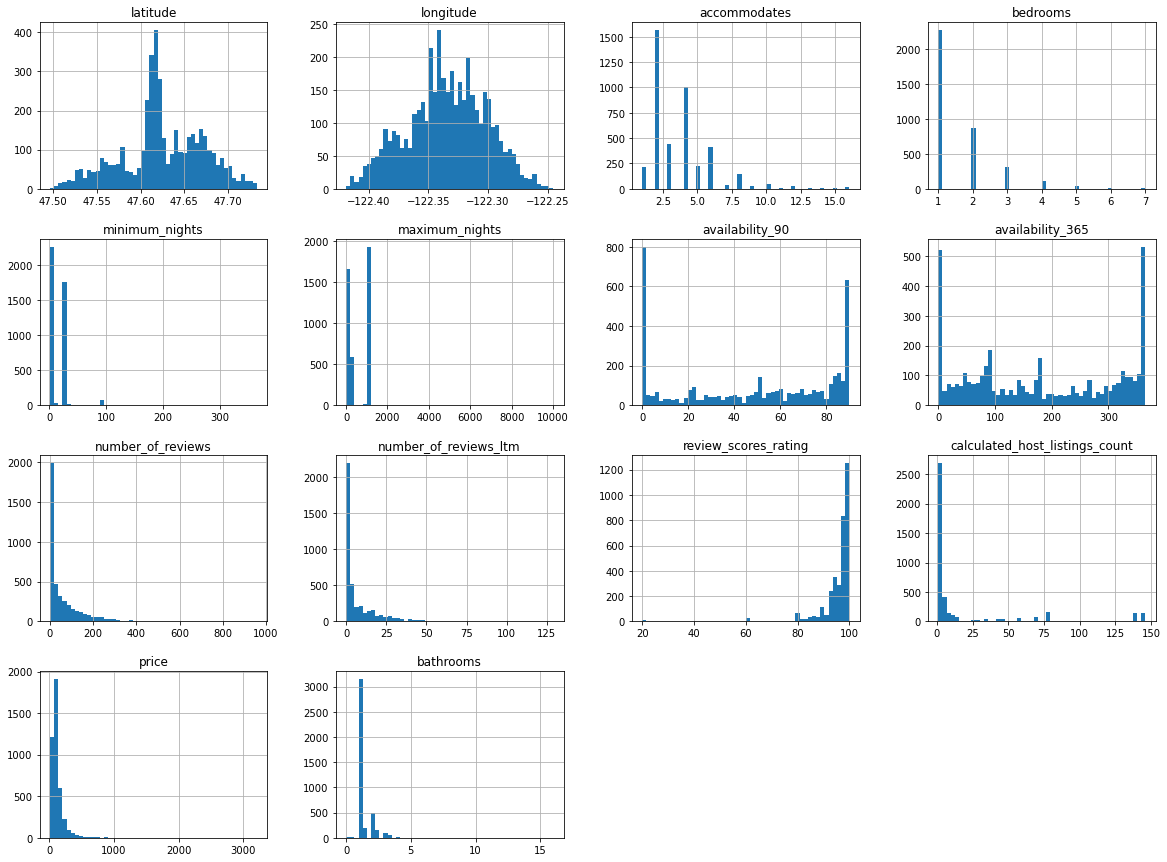

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
listing.hist(bins=50, figsize=(20,15))
plt.show()

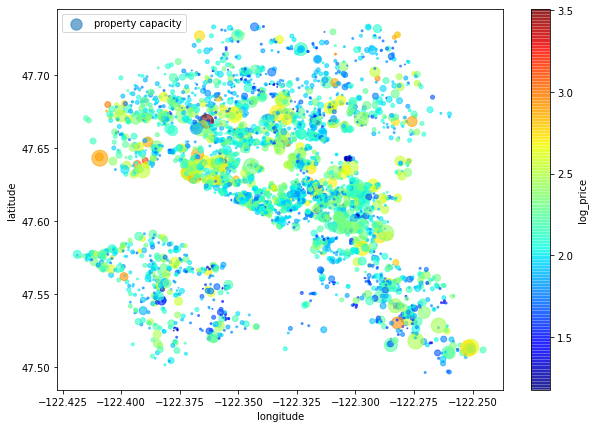

In [69]:
listing_map = listing.copy()
listing_map["log_price"] = np.log10(listing_map["price"])
fig, ax = plt.subplots()
listing_map.plot(ax=ax,kind="scatter",x="longitude",y="latitude",alpha=0.6,s=listing["accommodates"]**2,label="property capacity",
            figsize=(10,7), c="log_price",cmap=plt.get_cmap("jet"),colorbar=True)
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(8,8))
m = Basemap(projection="ortho", resolution=None, lat_0=50,lon_0=-100)
m.bluemarble(scale=0.5)

In [18]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1355094,2021-02-21,f,$27.00,$26.00,30.0,1125.0
1,1356339,2021-02-21,f,$119.00,$119.00,2.0,1125.0
2,1356339,2021-02-22,f,$119.00,$119.00,2.0,1125.0
3,1356339,2021-02-23,f,$119.00,$119.00,2.0,1125.0
4,1356339,2021-02-24,f,$119.00,$119.00,2.0,1125.0


In [19]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [20]:
calendar["price"].replace(regex={"[\$,]":""},inplace=True)
calendar["price"] = calendar["price"].astype(float)
calendar["adjusted_price"].replace(regex={"[\$,]":""},inplace=True)
calendar["adjusted_price"] = calendar["price"].astype(float)

In [21]:
calendar["price_2000"] = (calendar["price"] > 2000).astype(int)

In [35]:
price_dict = {0:"orange",1:"blue"}

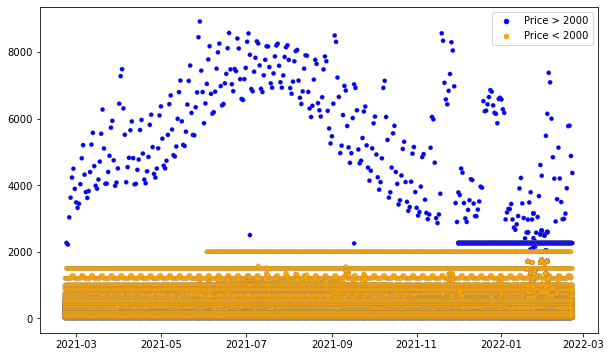

In [61]:
fig = plt.figure(figsize=(10,6))
plt.scatter(data=calendar,x='date',y='price',c=calendar["price_2000"].apply(lambda x: price_dict[x]),
              s=20,linewidths=0.2,edgecolors='gray',label=None)

plt.scatter([],[],c='blue',s=20,label="Price > 2000")
plt.scatter([],[],c='orange',s=20,label="Price < 2000")
plt.legend(loc="upper right")

In [23]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


In [425]:
listing.head()

,latitude,longitude,accommodates,bedrooms,minimum_nights,maximum_nights,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,price,neighbourhood_group_cleansed,room_type,host_is_superhost,bathrooms
id,,,,,,,,,,,,,,,,,
2318,47.61082,-122.29082,9,4.0,30,1125,0,107,32,0,100.0,1,296.0,Central Area,Entire home/apt,f,2.5
9419,47.55017,-122.31937,2,1.0,2,180,53,328,148,0,93.0,7,55.0,Other neighborhoods,Private room,t,3.0
9531,47.55539,-122.38474,4,2.0,30,1125,83,327,41,1,100.0,2,155.0,West Seattle,Entire home/apt,t,1.0
9534,47.55624,-122.38598,3,2.0,30,1125,27,204,55,7,100.0,2,125.0,West Seattle,Entire home/apt,t,1.0
9596,47.65479,-122.33652,4,1.0,4,60,31,31,97,4,91.0,2,100.0,Other neighborhoods,Entire home/apt,f,1.0


In [427]:
listing = listing[['latitude','longitude','accommodates','bedrooms','bathrooms','minimum_nights','maximum_nights',
                 'availability_90','availability_365','number_of_reviews','number_of_reviews_ltm','review_scores_rating',
                 'calculated_host_listings_count','price','neighbourhood_group_cleansed','room_type','host_is_superhost']]

In [428]:
def split_train_test(data, test_ratio):
    shuffledindices = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_indices = shuffledindices[:test_size]
    train_indices = shuffledindices[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(listing, 0.2)
train_set.shape, test_set.shape

((3357, 17), (839, 17))

<ipython-input-429-d26d07a8b7cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing["price_cat"] = pd.cut(listing["price"],


<AxesSubplot:>

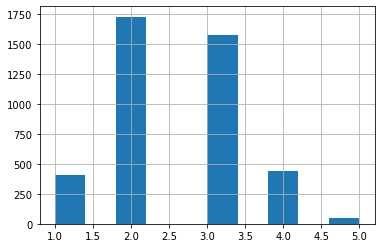

In [429]:
listing["price_cat"] = pd.cut(listing["price"],
                             bins=[0., 50., 100., 200., 500., np.inf],
                             labels=[1,2,3,4,5])
listing["price_cat"].hist()

In [430]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(listing, listing["price_cat"]):
    strat_train_set = listing.iloc[train_index]
    strat_test_set = listing.iloc[test_index]
strat_test_set["price_cat"].value_counts()/len(strat_test_set)

2    0.410714
3    0.375000
4    0.105952
1    0.096429
5    0.011905
Name: price_cat, dtype: float64

In [431]:
strat_train_set.drop("price_cat", axis=1, inplace=True)
strat_test_set.drop("price_cat", axis=1, inplace=True)

C:\Users\j8654\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [432]:
corr_matrix = listing.corr()
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
bedrooms                          0.507738
accommodates                      0.505371
bathrooms                         0.362260
availability_365                  0.083644
maximum_nights                    0.079040
review_scores_rating              0.071893
availability_90                   0.031657
latitude                          0.030996
minimum_nights                    0.030387
calculated_host_listings_count    0.026386
longitude                        -0.077897
number_of_reviews                -0.117092
number_of_reviews_ltm            -0.118495
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='accommodates', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='accommodates', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='bedrooms'>],
       [<AxesSubplot:xlabel='price', ylabel='accommodates'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='accommodates'>,
        <AxesSubplot:xlabel='accommodates', ylabel='accommodates'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='accommodates'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='accommodates'>],
       [<AxesSubplot:xlabel='price', ylabel='bathrooms'>,
 

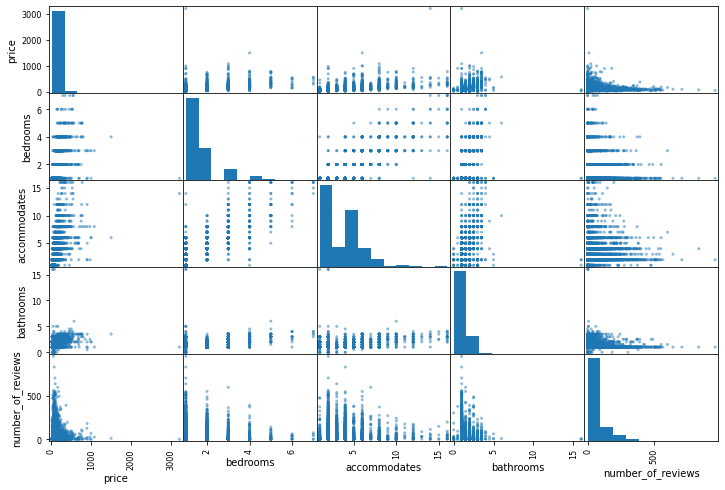

In [433]:
from pandas.plotting import scatter_matrix
attributes = ["price","bedrooms","accommodates","bathrooms","number_of_reviews"]
scatter_matrix(listing[attributes],figsize=(12,8))

In [434]:
listing = strat_train_set.drop("price",axis=1)
listing_labels = strat_train_set["price"].copy()

In [435]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
listing_num = listing.drop(["host_is_superhost","neighbourhood_group_cleansed","room_type"],axis=1)
imputer.fit(listing_num)
imputer.statistics_

array([  47.62066, -122.33457,    3.     ,    1.     ,    1.     ,
          5.     ,  365.     ,   53.     ,  172.     ,   24.     ,
          2.     ,   98.     ,    2.     ])

In [436]:
X = imputer.transform(listing_num)
listing_tr = pd.DataFrame(X, columns=listing_num.columns, index=listing_num.index)

In [437]:
from sklearn.base import BaseEstimator, TransformerMixin

bathrooms_ix, bedrooms_ix, reviews_num_ix, reviews_score_ix = 3, 4, 9, 11

class CombineAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_bathrooms = True):
        self.add_bedrooms_bathrooms = add_bedrooms_bathrooms
    def fit(self, y=None):
        return self
    def transform(self, X):
        mean_reviews = np.zeros(len(X))
        no_reviews = X[:,reviews_num_ix] == 0
        mean_reviews[no_reviews] = np.nan
        mean_reviews[~no_reviews] = X[~no_reviews,reviews_score_ix] / X[~no_reviews,reviews_num_ix]
        if self.add_bedrooms_bathrooms:
            bedrooms_bathrooms = X[:,bedrooms_ix] + X[:,bathrooms_ix]
            return np.c_[X, mean_reviews, bedrooms_bathrooms]
        else:
            return np.c_[X, mean_reviews]

attr_adder = CombineAttrAdder(add_bedrooms_bathrooms=False)
listing_extra_attrs = attr_adder.transform(listing.values)

In [460]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attrs_adder', CombineAttrAdder()),
    ('imputer2', SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler())
])
listing_num_tr = num_pipeline.fit_transform(listing_num)

In [466]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 16617445 to 48112193
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        3356 non-null   float64
 1   longitude                       3356 non-null   float64
 2   accommodates                    3356 non-null   int64  
 3   bedrooms                        2900 non-null   float64
 4   bathrooms                       3353 non-null   float64
 5   minimum_nights                  3356 non-null   int64  
 6   maximum_nights                  3356 non-null   int64  
 7   availability_90                 3356 non-null   int64  
 8   availability_365                3356 non-null   int64  
 9   number_of_reviews               3356 non-null   int64  
 10  number_of_reviews_ltm           3356 non-null   int64  
 11  review_scores_rating            2735 non-null   float64
 12  calculated_host_listing

In [467]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

num_attribs = list(listing_num)
cat_attribs = ["neighbourhood_group_cleansed","room_type","host_is_superhost"]

cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder())])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

listing_prepared = full_pipeline.fit_transform(listing)

In [470]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
param_dis = {
    'n_estimators': randint(low=1,high=300),
    'max_features':randint(low=1,high=30),
    'max_depth': randint(low=2, high=50),
    'min_samples_leaf': randint(low=1, high=50)
    }
forest_reg = RandomForestRegressor()
rnt_search = RandomizedSearchCV(forest_reg, param_distributions= param_dis, n_iter=10, cv=5,
                          scoring="neg_mean_squared_error")
rnt_search.fit(listing_prepared, listing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002568F73B610>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002568F73B310>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002568F73B070>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002568F73B6A0>},
                   scoring='neg_mean_squared_error')

In [446]:
rnt_search.best_params_

{'max_depth': 11,
 'max_features': 20,
 'min_samples_leaf': 3,
 'n_estimators': 248}

In [447]:
cvres = rnt_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score), params)

91.32818973021075 {'max_depth': 12, 'max_features': 25, 'min_samples_leaf': 8, 'n_estimators': 104}
94.72250562542563 {'max_depth': 4, 'max_features': 20, 'min_samples_leaf': 9, 'n_estimators': 43}
93.97372471095528 {'max_depth': 39, 'max_features': 9, 'min_samples_leaf': 31, 'n_estimators': 263}
90.49942418252826 {'max_depth': 11, 'max_features': 20, 'min_samples_leaf': 3, 'n_estimators': 248}
94.19770267066 {'max_depth': 10, 'max_features': 29, 'min_samples_leaf': 31, 'n_estimators': 15}
95.81593803087551 {'max_depth': 48, 'max_features': 6, 'min_samples_leaf': 44, 'n_estimators': 158}
94.49591616722212 {'max_depth': 28, 'max_features': 11, 'min_samples_leaf': 40, 'n_estimators': 194}
95.37009668566907 {'max_depth': 5, 'max_features': 13, 'min_samples_leaf': 47, 'n_estimators': 247}
91.55197247093754 {'max_depth': 26, 'max_features': 14, 'min_samples_leaf': 12, 'n_estimators': 115}
94.84369096430008 {'max_depth': 33, 'max_features': 11, 'min_samples_leaf': 43, 'n_estimators': 203}


In [448]:
feature_importances = rnt_search.best_estimator_.feature_importances_
feature_importances

array([4.83464111e-02, 5.69132513e-02, 1.55769951e-01, 1.11753950e-01,
       6.03350415e-02, 1.46265702e-02, 1.72058829e-02, 6.26585925e-02,
       4.90723810e-02, 2.48449476e-02, 3.14513608e-02, 1.94480647e-02,
       2.83998874e-02, 1.96810615e-02, 2.23999233e-01, 3.82416937e-03,
       3.78722386e-04, 1.09361535e-03, 1.42533860e-02, 1.09450711e-03,
       2.41892633e-04, 4.02149995e-03, 5.52571593e-06, 4.43068896e-03,
       3.32568019e-03, 1.85460825e-04, 3.11050896e-03, 5.83564016e-03,
       3.62384658e-04, 5.63292817e-05, 3.94407748e-04, 5.24556183e-04,
       1.97724404e-02, 2.97221510e-04, 6.26282012e-03, 9.34386004e-04,
       2.76344721e-03, 2.32412236e-03])

In [469]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, listing_prepared, listing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean()

119.98690409669709

In [451]:
extra_attr = ["mean_review_score","bedrooms_bathrooms"]
cat_encoder = full_pipeline.named_transformers_["cat"]["one_hot"]
one_hot_attrs = []
for att in cat_encoder.categories_: one_hot_attrs.extend(list(att))
attrs = num_attribs + extra_attr + one_hot_attrs
sorted(zip(feature_importances, attrs), reverse=True)

[(0.22399923324650928, 'bedrooms_bathrooms'),
 (0.15576995073724478, 'accommodates'),
 (0.11175395037128222, 'bedrooms'),
 (0.06265859252957523, 'availability_90'),
 (0.06033504152144169, 'bathrooms'),
 (0.056913251319913385, 'longitude'),
 (0.04907238099942906, 'availability_365'),
 (0.0483464111329571, 'latitude'),
 (0.03145136082998154, 'number_of_reviews_ltm'),
 (0.028399887414908846, 'calculated_host_listings_count'),
 (0.024844947624944495, 'number_of_reviews'),
 (0.019772440364270435, 'Entire home/apt'),
 (0.01968106148389945, 'mean_review_score'),
 (0.01944806466675154, 'review_scores_rating'),
 (0.01720588285059222, 'maximum_nights'),
 (0.014626570218051214, 'minimum_nights'),
 (0.014253385986260712, 'Cascade'),
 (0.006262820124522513, 'Private room'),
 (0.005835640159565738, 'Queen Anne'),
 (0.004430688959371799, 'Lake City'),
 (0.004021499954485389, 'Downtown'),
 (0.0038241693722869366, 'Ballard'),
 (0.003325680185561829, 'Magnolia'),
 (0.00311050896005091, 'Other neighborho

In [454]:
final_model = rnt_search.best_estimator_

X_test = strat_test_set.drop("price",axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

62.47534982481683

In [462]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(listing_num_tr, listing_labels)
listing_preds = lin_reg.predict(listing_num_tr)
lin_mse = mean_squared_error(listing_labels, listing_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

96.58116582065283

In [463]:
sorted(zip(lin_reg.coef_, list(listing_num)+["mean_review_score","bedrooms_bathrooms"]), reverse=True)

[(37.613291180229396, 'accommodates'),
 (12.371073684606845, 'bedrooms'),
 (11.019893794607418, 'bedrooms_bathrooms'),
 (8.11142684985965, 'review_scores_rating'),
 (6.413946378232176, 'availability_90'),
 (6.334974524742088, 'bathrooms'),
 (5.73526453064844, 'calculated_host_listings_count'),
 (4.333631756544576, 'latitude'),
 (3.974728307297653, 'availability_365'),
 (3.8613294953205104, 'maximum_nights'),
 (3.5130362550486165, 'minimum_nights'),
 (-1.7572169004492615, 'mean_review_score'),
 (-3.5006489522750877, 'number_of_reviews'),
 (-9.112299834641307, 'longitude'),
 (-9.39038643797767, 'number_of_reviews_ltm')]

In [465]:
X_test_num = X_test.drop(["host_is_superhost","neighbourhood_group_cleansed","room_type"],axis=1)
X_test_num = num_pipeline.transform(X_test_num)
final_predictions = lin_reg.predict(X_test_num)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

65.98624897287372